# Feature Extraction

In [0]:
# Library
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [0]:
# generate training data
N = 100
m1 = np.mat([0, 0]); s1 = np.mat([[9, 0], [0, 1]])    # Class 1
m2 = np.mat([0, 4]); s2 = np.mat([[9, 0], [0, 1]])    # Class 2
X1 = np.matmul(np.random.randn(N, 2), sqrtm(s1)) + np.tile(m1, (N, 1))    # Class 1
X2 = np.matmul(np.random.randn(N, 2), sqrtm(s2)) + np.tile(m2, (N, 1))    # Class 2

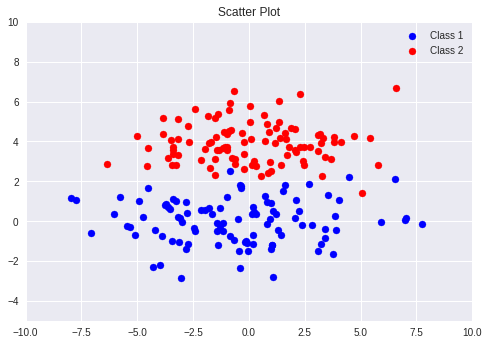

In [3]:
# scatter plot
plt.scatter(np.array(X1[:,0]), np.array(X1[:,1]), c='b', label='Class 1')
plt.scatter(np.array(X2[:,0]), np.array(X2[:,1]), c='r', label='Class 2')
plt.axis([-10, 10, -5, 10])
plt.legend()
plt.title('Scatter Plot')
plt.show()

## PCA

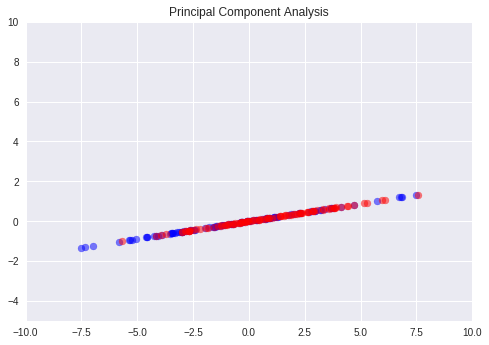

In [4]:
# PCA
X = np.concatenate((X1, X2))
M = np.mean(X, axis=0)
S = np.cov(X.T)
D, V = np.linalg.eig(S)
pcaW = np.mat(V[:,0])
YX1 = np.matmul(X1, pcaW.T)    # PCA feautre for class 1
YX2 = np.matmul(X2, pcaW.T)    # PCA feature for class 2
pYX1 = np.matmul(YX1, pcaW)    # Revert pca feautre
pYX2 = np.matmul(YX2, pcaW)    # Revert pca feautre 
plt.scatter(np.array(pYX1[:,0]), np.array(pYX1[:,1]), c='b', alpha=0.5)
plt.scatter(np.array(pYX2[:,0]), np.array(pYX2[:,1]), c='r', alpha=0.5)
plt.axis([-10, 10, -5, 10])
plt.title('Principal Component Analysis')
plt.show()

## LDA

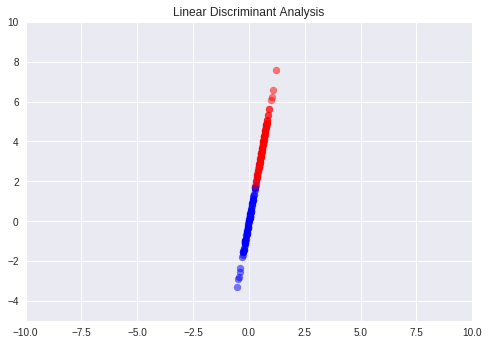

In [5]:
# LDA
m1 = np.mean(X1, axis=0); m2 = np.mean(X2, axis=0)
Sw = N * np.cov(X1.T) + N * np.cov(X2.T)
Sb = (m1 - m2).T * (m1 - m2)
D, V = np.linalg.eig(np.matmul(Sb, np.linalg.inv(Sw)))
ldaW = np.mat(V[:,1])
ZX1 = np.matmul(X1, ldaW)    # LDA feature for class 1
ZX2 = np.matmul(X2, ldaW)    # LDA feature for class 2
pZX1 = np.matmul(ZX1, ldaW.T)    # Revert lda feature
pZX2 = np.matmul(ZX2, ldaW.T)    # Revert lda feature
plt.scatter(np.array(pZX1[:,0]), np.array(pZX1[:,1]), c='b', alpha=0.5)
plt.scatter(np.array(pZX2[:,0]), np.array(pZX2[:,1]), c='r', alpha=0.5)
plt.axis([-10, 10, -5, 10])
plt.title('Linear Discriminant Analysis')
plt.show()

## PCA vs. LDA Scatter Plot

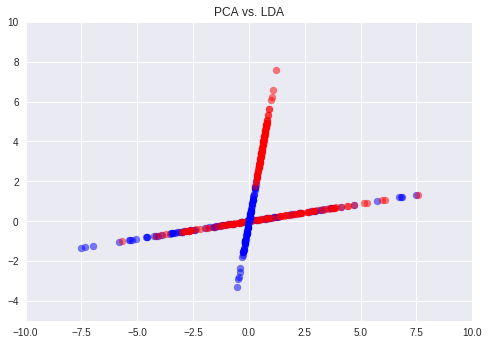

In [6]:
plt.scatter(np.array(pYX1[:,0]), np.array(pYX1[:,1]), c='b', alpha=0.5)
plt.scatter(np.array(pYX2[:,0]), np.array(pYX2[:,1]), c='r', alpha=0.5)
plt.scatter(np.array(pZX1[:,0]), np.array(pZX1[:,1]), c='b', alpha=0.5)
plt.scatter(np.array(pZX2[:,0]), np.array(pZX2[:,1]), c='r', alpha=0.5)
plt.axis([-10, 10, -5, 10])
plt.title('PCA vs. LDA')
plt.show()